# Preditor Linear Ótimo
## Processo Autoregressivo (AR) de primeira ordem

Considere um processo AR de primeira ordem

$X[n] = aX[n-1] + W[n]$

em que $W[n]$ é um processo ruído gaussiano branco com variância $\sigma_W^2$ e descorrelacionado com  $X[n-1], X[n-2],\ldots$.

## Projeto 1 - Usando apenas $X[n]$

Vamos projetar e simular um filtro preditor linear ótimo  para $X[n+1]$ dado $X[n]$ e estimar o erro quadrático médio.

ou seja,

$\hat{X}[n+1] = h[0]X[n]$

## Cálculo do parâmetro do preditor

O parâmetro do filtro linear preditor ótimo tem a forma geral

$R_Y(m+1) = \sum_{k=0}^\infty h[k]R_Y[m-k], \quad m=0,1,\ldots$

considerando apenas a amostra atual para estimação da amostra futura então $m=0$ e

$R_X[1] = h[0]R_X[0]$

Sabemos que 

$R_X[k] = \frac{\sigma_W^2}{1- a^2} a^{|k|} = R_X[0] a^{|k|}$

assim

$h[0] = R_X[1]/R_X[0] = R_X[0] a/R_X[0] = a$

de modo que 

$\hat{X}[n+1] = aX[n]$

ou seja o termo $W[n]$ referente ao incremento do processo AR, $X[n] = aX[n-1] + W[n]$, é totalmente ignorado. Isso vem do fato de $W[n]$ ser descorrelacionado com  $X[n-1], X[n-2],\ldots$.

Podemos calcular a precicabilidade de $X[n+1]$ por seus coeficientes de correlação por

$\rho[k] = R_Y[k]/R_Y[0]$

In [6]:
"""
@author: albert
IQuanta - DEE - UFCG
Data: agosto 2022
Versão: 1.0

Processo AR

X[n] = aX[n-1] + W[n]

Preditor Linear para X[n+1]

R_X[k] = (sigma_W**2/(1-a**2))*a**|k| = R_X[0]*a**|k|
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

#  Vamos dois valores para a variável a = {0,9 e 0,2}
a =0.2

# normalizando rho[0] = 1  => sigmaW2 = var(W) = 1 - a**2
sigmaW2 = 1 - a**2
rho_0 = 1

# Cálculo do coeficiente de correlação rho[1]

rho_1 = a

print("[rho[0], rho[1]] = [", rho_0,",", rho_1,"]")

[rho[0], rho[1]] = [ 1 , 0.2 ]


Observe que $\rho[1] = 0,9$ é um coeficiente de correlação muito bom que deve produzir bons resultados do preditor e $\rho[1] = 0,2$ é um coeficiente de correlação muito ruim e deve produzir resultados ruins do preditor.

## Simulação

Vamos gerar 100 amostras de $X[n]$ e estimando $X[n+1]$ usando o preditor $\hat{X}[n+1]$

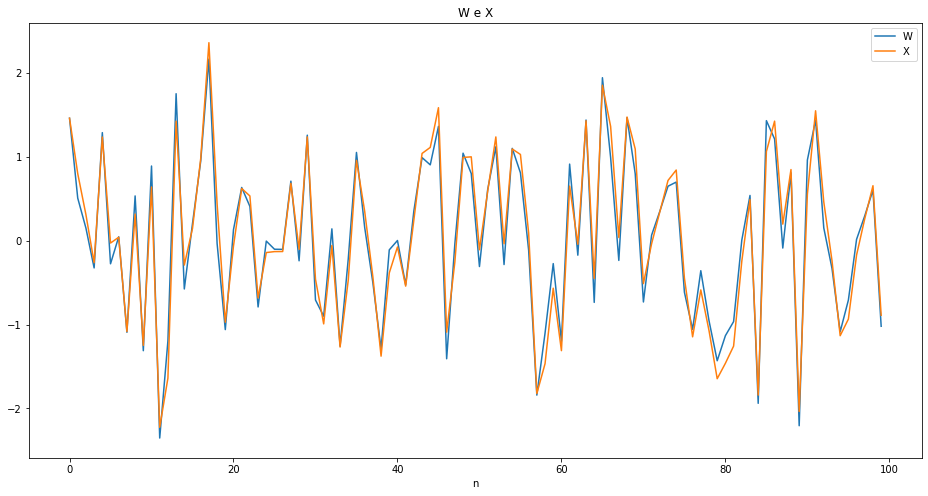

In [7]:
# Vimos que h[0] = a e {X}[n+1] = aX[n] é a estimação

Na = 100    # número de amostras

# gera W[n] ruído gaussiano branco com variância sigmaW2

sigmaW = sigmaW2**0.5 # desvio padrão de W[n]
W = np.random.normal(0, sigmaW, Na)

# gera X[n] = aX[n-1] + W[n]

X = np.zeros(Na)
X[0] = W[0]             # X[k] = 0 para k < 0


for i in range(1,Na):
    X[i] = a*X[i-1] + W[i]
    
n = np.arange(0,Na,1)
plt.figure(figsize=(16, 8))
plt.plot(n,W,label='W')
plt.plot(n,X,label='X')
plt.legend()
plt.title('W e X')
#   plt.ylabel('Freq. Relativa')
plt.xlabel('n')
plt.show()

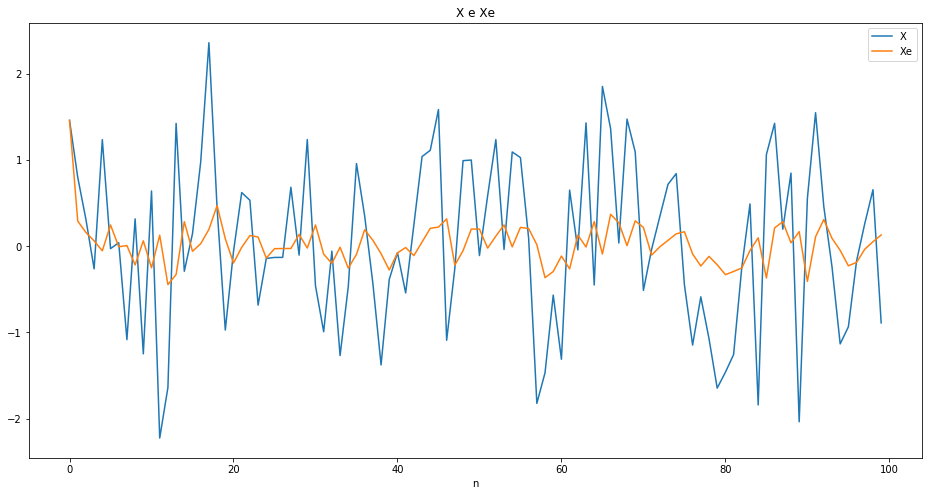

In [8]:
# usando o preditor
Xe = np.zeros(Na)   # Xe[n+1] = aX[n]
Xe[0] = W[0]
for i in range(1,Na):
    Xe[i] = a*X[i-1]

plt.figure(figsize=(16, 8))
plt.plot(n,X,label='X')
plt.plot(n,Xe,label='Xe')
plt.legend()
plt.title('X e Xe')
#   plt.ylabel('Freq. Relativa')
plt.xlabel('n')
plt.show()   

## Erro quadrático médio

O erro de predição será

$e[n+1] = X[n+1] - \hat{X}[n+1] = (aX[n] + W[n+1]) - aX[n] = W[n+1]$

que é o valor da v.a. $W[n+1]$
 
O erro quadrático médio, $E[e^2[n+1]]$ é determinado por

$E[e^2[n+1]] = E[W^2[n+1] = \text{var}(W) = \sigma_W^2$

O erro quadrático médio é dado pela variância de $W[n]$ o que seria esperado pois o erro de estimação é o valor da própria v.a $W[n]$.

O valor estimado na simulação será

In [9]:
# cálculo do erro
erro = X - Xe

erroq = erro**2    # erro quadrático

Eerroq = sum(erroq)/Na # média amostral do erro quadrático

Eerroq_teorico = sigmaW2

print("Estimativa do erro quadrático médio = ", Eerroq)
print("Valor teórico = ", Eerroq_teorico)

Estimativa do erro quadrático médio =  0.8903755021135872
Valor teórico =  0.96


## Projeto 2 - Usando apenas $X[n]$ e $X[n-1]$

Vamos estimar $X[n+1]$ usando $X[n]$ e $X[n-1]$

$\hat{X}[n+1] = h[0]X[n] + h[1]X[n-1] = \sum_{k=0}^1 h[k]X[n-k]$

## Cálculo dos parâmetros do preditor

Os parâmetros do filtro linear preditor ótimo podem ser calculados da seguinte forma

$R_X(m+1) = \sum_{k=0}^1 h[k]R_X[m-k], \quad m=0,1.$

temos um sistema linear 

$\begin{bmatrix} R_X[1] \\ R_X[2]  \end{bmatrix} = \begin{bmatrix} R_X[0] & R_X[-1]  \\ R_X[1] & R_X[0] \end{bmatrix} \begin{bmatrix} h[0] \\ h[1]  \end{bmatrix}$

### Calculando $R_X[k]$

Usando $R_X[k] = \frac{\sigma_W^2}{1- a^2} a^{|k|} = R_X[0] a^{|k|}$

$R_X[0] = \frac{\sigma_W^2}{1- a^2}, \quad R_X[1] = R_X[0] a, \quad R_X[2] = R_X[0] a^2$

Substituindo os valores no sistema linear e depois de algumas contas temos

$h[0] = a, \quad h[1] = 0$

pode-se provar que $h[k] = 0$ para $k > 0$, isso se deve ao fato desse processo ser markoviano, o estado futura só depende do estado atual e não do seu passado. Ou seja, a predição $\hat{X}[n+1]$ só depende de $X[n]$.
